In [1]:
import sys
sys.path.append("..")
import jsq_ps.models as jsq
import aux.models as aux
import pandas as pd
import ciw
import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Runtime analysis
For a system with $R$ parallel servers and a `mc_limit` of $m$, the underlying Markov chain will have $m^R$ states. Therefore there are $\left(m^R\right)^2 = m^{2R}$ transitions. This can be used as an approximate measure for runtime, because each transition has to be filled in manually.

Below is a table of $ m^{2R}$ for different values of $R$ and $m$. We see that things get very big very quickly.

In [2]:
sizes = {}
mc_limits = range(1, 23)
Rs = range(1, 11)
for R in Rs:
    sizes[f'R = {R}'] = []
    for mc_limit in mc_limits:
        num_transitions = (mc_limit ** R) ** 2
        sizes[f'R = {R}'].append(num_transitions)

In [3]:
pd.DataFrame(sizes, index=mc_limits)

R = 1   R = 2      R = 3        R = 4           R = 5              R = 6  \
1       1       1          1            1               1                  1   
2       4      16         64          256            1024               4096   
3       9      81        729         6561           59049             531441   
4      16     256       4096        65536         1048576           16777216   
5      25     625      15625       390625         9765625          244140625   
6      36    1296      46656      1679616        60466176         2176782336   
7      49    2401     117649      5764801       282475249        13841287201   
8      64    4096     262144     16777216      1073741824        68719476736   
9      81    6561     531441     43046721      3486784401       282429536481   
10    100   10000    1000000    100000000     10000000000      1000000000000   
11    121   14641    1771561    214358881     25937424601      3138428376721   
12    144   20736    2985984    429981696     61917364224      8916100448256   
13    169   28561    4826809    815730721    137858491849     23298085122481   
14    196   38416    7529536   1475789056    289254654976     56693912375296   
15    225   50625   11390625   2562890625    576650390625    129746337890625   
16    256   65536   16777216   4294967296   1099511627776    281474976710656   
17    289   83521   24137569   6975757441   2015993900449    582622237229761   
18    324  104976   34012224  11019960576   3570467226624   1156831381426176   
19    361  130321   47045881  16983563041   6131066257801   2213314919066161   
20    400  160000   64000000  25600000000  10240000000000   4096000000000000   
21    441  194481   85766121  37822859361  16679880978201   7355827511386641   
22    484  234256  113379904  54875873536  26559922791424  12855002631049216   

                  R = 7                   R = 8                      R = 9  \
1                     1                       1                          1   
2                 16384                   65536                     262144   
3               4782969                43046721                  387420489   
4             268435456              4294967296                68719476736   
5            6103515625            152587890625              3814697265625   
6           78364164096           2821109907456            101559956668416   
7          678223072849          33232930569601           1628413597910449   
8         4398046511104         281474976710656          18014398509481984   
9        22876792454961        1853020188851841         150094635296999121   
10      100000000000000       10000000000000000        1000000000000000000   
11      379749833583241       45949729863572161        5559917313492231481   
12     1283918464548864      184884258895036416       26623333280885243904   
13     3937376385699289      665416609183179841      112455406951957393129   
14    11112006825558016     2177953337809371136      426878854210636742656   
15    29192926025390625     6568408355712890625     1477891880035400390625   
16    72057594037927936    18446744073709551616     4722366482869645213696   
17   168377826559400929    48661191875666868481    14063084452067724991009   
18   374813367582081024   121439531096594251776    39346408075296537575424   
19   799006685782884121   288441413567621167681   104127350297911241532841   
20  1638400000000000000   655360000000000000000   262144000000000000000000   
21  3243919932521508681  1430568690241985328321   630880792396715529789561   
22  6221821273427820544  3011361496339065143296  1457498964228107529355264   

                         R = 10  
1                             1  
2                       1048576  
3                    3486784401  
4                 1099511627776  
5                95367431640625  
6              3656158440062976  
7             79792266297612001  
8           1152921504606846976  
9          12157665459056928801  
10        100000000000000000

And in scientific notation to make it easier to read:

In [4]:
sizes_sn = {}
mc_limits = range(1, 23)
Rs = range(1, 11)
for R in Rs:
    sizes_sn[f'R = {R}'] = []
    for mc_limit in mc_limits:
        num_transitions = (mc_limit ** R) ** 2
        n = len(str(num_transitions))
        rounded_num = str(round(num_transitions, -n+2))[:2] + 'e' + str(n)
        sizes_sn[f'R = {R}'].append(rounded_num)

In [5]:
pd.DataFrame(sizes_sn, index=mc_limits)

R = 1 R = 2 R = 3  R = 4  R = 5  R = 6  R = 7  R = 8  R = 9 R = 10
1    1e1   1e1   1e1    1e1    1e1    1e1    1e1    1e1    1e1    1e1
2    4e1  16e2  64e2   26e3   10e4   41e4   16e5   66e5   26e6   10e7
3    9e1  81e2  73e3   66e4   59e5   53e6   48e7   43e8   39e9  35e10
4   16e2  26e3  41e4   66e5   10e7   17e8   27e9  43e10  69e11  11e13
5   25e2  62e3  16e5   39e6   98e7   24e9  61e10  15e12  38e13  95e14
6   36e2  13e4  47e5   17e7   60e8  22e10  78e11  28e13  10e15  37e16
7   49e2  24e4  12e6   58e7   28e9  14e11  68e12  33e14  16e16  80e17
8   64e2  41e4  26e6   17e8  11e10  69e11  44e13  28e15  18e17  12e19
9   81e2  66e4  53e6   43e8  35e10  28e12  23e14  19e16  15e18  12e20
10  10e3  10e5  10e7   10e9  10e11  10e13  10e15  10e17  10e19  10e21
11  12e3  15e5  18e7   21e9  26e11  31e13  38e15  46e17  56e19  67e21
12  14e3  21e5  30e7   43e9  62e11  89e13  13e16  18e18  27e20  38e22
13  17e3  29e5  48e7   82e9  14e12  23e14  39e16  67e18  11e21  19e23
14  20e3  38e5  75e7  15e10  29e12  57e14  11e17  22e19  43e21  84e23
15  22e3  51e5  11e8  26e10  58e12  13e15  29e17  66e19  15e22  33e24
16  26e3  66e5  17e8  43e10  11e13  28e15  72e17  18e20  47e22  12e25
17  29e3  84e5  24e8  70e10  20e13  58e15  17e18  49e20  14e23  41e25
18  32e3  10e6  34e8  11e11  36e13  12e16  37e18  12e21  39e23  13e26
19  36e3  13e6  47e8  17e11  61e13  22e16  80e18  29e21  10e24  38e26
20  40e3  16e6  64e8  26e11  10e14  41e16  16e19  66e21  26e24  10e27
21  44e3  19e6  86e8  38e11  17e14  74e16  32e19  14e22  63e24  28e27
22  48e3  23e6  11e9  55e11  27e14  13e17  62e19  30e22  15e25  71e27

# Do we need a big `mc_limit`?
If `mc-limit` is $m$, then we are only capturing states where each server serves _less_ than $m$ customers at a time.

How often do we have a situation where we have servers serving $m$ or more customers at a time? Let's find out:

(Note: this probability of exceeding the `mc_limit` is not an exact measure of error in the system. If we visit uncaptured states frequently, then the analysis for the staes we do capture will be wrong. However if we visit uncaptures states very infrequently, then we can be more confident that we have accurate analysis for the states we do capture.)

In [6]:
data = {}
for R in tqdm.tqdm(range(1, 10)):
    data[R] = {}
    for rho in [0.85, 0.9, 0.95]:
        lambda_ = 10
        mu = lambda_ / (R * rho)
        max_time = 20000
        warmup = 1000
        S = jsq.Simulation(lambda_=lambda_, mu=mu, R=R, max_time=max_time, warmup=warmup, tracker=ciw.trackers.NodePopulation(), ps_bar=False)
        S.run(seed=0)
        pmf = S.Q.statetracker.state_probabilities(observation_period=(warmup, max_time-warmup))
        probs = []
        for mc_limit in range(1, 23):
            running_prob = 0.0
            for state in pmf:
                if any([s > mc_limit for s in state]):
                    running_prob += pmf[state]
            probs.append(running_prob)
        data[R][rho] = probs

100%|██████████| 9/9 [08:00<00:00, 56.32s/it]


In [7]:
dict_of_df = {k: pd.DataFrame(v) for k,v in data.items()}
data_df = pd.concat(dict_of_df, axis=1).T

In [8]:
data_df.round(2)

0     1     2     3     4     5     6     7     8     9   ...    12  \
1 0.85  0.72  0.61  0.52  0.44  0.37  0.32  0.27  0.23  0.19  0.16  ...  0.10   
  0.90  0.81  0.73  0.65  0.58  0.53  0.47  0.42  0.38  0.34  0.31  ...  0.22   
  0.95  0.90  0.85  0.81  0.76  0.72  0.69  0.65  0.62  0.58  0.55  ...  0.47   
2 0.85  0.74  0.55  0.39  0.28  0.20  0.14  0.10  0.07  0.05  0.04  ...  0.01   
  0.90  0.82  0.68  0.55  0.44  0.36  0.29  0.23  0.18  0.15  0.12  ...  0.06   
  0.95  0.91  0.82  0.74  0.67  0.60  0.53  0.48  0.43  0.38  0.34  ...  0.24   
3 0.85  0.75  0.48  0.30  0.18  0.11  0.07  0.04  0.02  0.01  0.01  ...  0.00   
  0.90  0.83  0.63  0.46  0.33  0.24  0.17  0.12  0.09  0.06  0.05  ...  0.02   
  0.95  0.91  0.80  0.68  0.58  0.49  0.41  0.35  0.29  0.24  0.20  ...  0.11   
4 0.85  0.75  0.43  0.22  0.11  0.06  0.03  0.01  0.01  0.00  0.00  ...  0.00   
  0.90  0.84  0.58  0.38  0.25  0.16  0.10  0.07  0.04  0.03  0.02  ...  0.00   
  0.95  0.92  0.77  0.62  0.50  0.40  0.32  0.25  0.19  0.15  0.11  ...  0.06   
5 0.85  0.76  0.38  0.17  0.07  0.03  0.01  0.01  0.00  0.00  0.00  ...  0.00   
  0.90  0.84  0.54  0.32  0.19  0.10  0.06  0.04  0.02  0.01  0.01  ...  0.00   
  0.95  0.92  0.75  0.57  0.43  0.33  0.24  0.17  0.13  0.09  0.07  ...  0.03   
6 0.85  0.76  0.33  0.13  0.05  0.02  0.01  0.00  0.00  0.00  0.00  ...  0.00   
  0.90  0.85  0.50  0.27  0.14  0.07  0.04  0.02  0.01  0.00  0.00  ...  0.00   
  0.95  0.93  0.72  0.53  0.38  0.26  0.18  0.12  0.08  0.06  0.04  ...  0.01   
7 0.85  0.76  0.29  0.09  0.03  0.01  0.00  0.00  0.00  0.00  0.00  ...  0.00   
  0.90  0.85  0.46  0.22  0.10  0.05  0.03  0.01  0.00  0.00  0.00  ...  0.00   
  0.95  0.93  0.69  0.48  0.32  0.21  0.13  0.09  0.06  0.04  0.03  ...  0.00   
8 0.85  0.75  0.25  0.07  0.02  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
  0.90  0.85  0.43  0.18  0.07  0.03  0.01  0.01  0.00  0.00  0.00  ...  0.00   
  0.95  0.93  0.67  0.44  0.28  0.16  0.10  0.06  0.04  0.02  0.01  ...  0.00   
9 0.85  0.75  0.22  0.05  0.01  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
  0.90  0.85  0.40  0.15  0.05  0.02  0.01  0.00  0.00  0.00  0.00  ...  0.00   
  0.95  0.94  0.65  0.40  0.23  0.13  0.07  0.05  0.03  0.01  0.01  ...  0.00   

          13    14    15    16    17    18    19    20    21  
1 0.85  0.08  0.07  0.06  0.05  0.04  0.04  0.03  0.03  0.02  
  0.90  0.20  0.18  0.16  0.14  0.13  0.11  0.10  0.09  0.08  
  0.95  0.44  0.42  0.40  0.37  0.35  0.33  0.31  0.29  0.28  
2 0.85  0.01  0.01  0.01  0.00  0.00  0.00  0.00  0.00  0.00  
  0.90  0.05  0.04  0.03  0.03  0.02  0.02  0.01  0.01  0.01  
  0.95  0.21  0.18  0.16  0.14  0.12  0.11  0.10  0.08  0.08  
3 0.85  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.90  0.01  0.01  0.01  0.00  0.00  0.00  0.00  0.00  0.00  
  0.95  0.09  0.08  0.07  0.06  0.05  0.04  0.03  0.03  0.02  
4 0.85  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.90  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.95  0.05  0.04  0.03  0.02  0.01  0.01  0.01  0.01  0.00  
5 0.85  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.90  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.95  0.02  0.01  0.01  0.01  0.00  0.00  0.00  0.00  0.00  
6 0.85  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.90  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.95  0.01  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
7 0.85  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.90  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.95  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
8 0.85  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.90  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.95  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
9 0.85  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.90  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
  0.95  0.00  0.00  0.00  0.00  0.00  0.

Attempt to plot this to make it more readable:

In [9]:
fig, axarr = plt.subplots(1, 9, figsize=(15, 15))
for i in range(9):
    im = axarr[i].imshow(np.matrix([data[i+1][rho] for rho in [0.95, 0.9, 0.85]]).T, vmin=0, vmax=1, cmap='Greys')
    axarr[i].set_xticks([0, 1, 2])
    axarr[i].set_xticklabels(["ρ = 0.95", "ρ = 0.9", "ρ = 0.85"], rotation=90, fontsize=14)
    axarr[i].set_yticks(range(0, 22))
    axarr[i].set_yticklabels(range(1, 23))
    axarr[i].set_title(f"R = {i+1}", fontsize=20)
    axarr[i].grid(None)
axarr[0].set_ylabel('mc_limit', family='monospace', fontsize=24)
cax = fig.add_axes([0.3, 0, 0.8, 0.05])
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Probability of exceeding `mc_limit`', fontsize=20)
plt.subplots_adjust(right=1.3)

+ As R increases the probability of exceeding low `mc_limit`s are very low, so we don't need a very big `mc_limit` to accurately model the system.

+ As R decreases the probability of exceeding high `mc_limit`s are still fairly high, so we do need a big `mc_limit`.

### Check if this does indeed affect accuracy ($\rho$ = 0.75 only)

In [10]:
def ensure_cdf_monotonic(cdf_with_errors):
    corrected_cdf = [cdf_with_errors[0]]
    for val in cdf_with_errors[1:]:
        corrected_cdf.append(max(corrected_cdf[-1], val))
    return corrected_cdf

In [11]:
accuracies = {}
times = np.linspace(0, 10, 1001)
mc_limits = range(2, 19)
for R in tqdm.tqdm(range(1, 9)):
    accuracies[R] = []
    rho = 0.75
    lambda_ = 10
    mu = lambda_ / (R * rho)
    max_time = 20000
    warmup = 1000
    S = jsq.Simulation(lambda_=lambda_, mu=mu, R=R, max_time=max_time, warmup=warmup, tracker=ciw.trackers.NodePopulation(), ps_bar=False)
    S.run(seed=0)
    S.find_sojourn_time_cdf(times)
    sim_cdf = ensure_cdf_monotonic(S.sojourn_time_cdf)
    for mc_limit in mc_limits:
        if sizes[f"R = {R}"][mc_limit-1] <= 1e9:
            M1 = jsq.Method1(lambda_=lambda_, mu=mu, R=R, mc_limit=mc_limit, infty=130, zero=0)
            M1.find_sojourn_time_cdf(times)
            model_cdf = ensure_cdf_monotonic(M1.sojourn_time_cdf)
            W = aux.wasserstein_distance(model_cdf, sim_cdf, 0.01)
        else:
            W = np.nan
        accuracies[R].append(W)

100%|██████████| 8/8 [1:11:52<00:00, 433.06s/it]


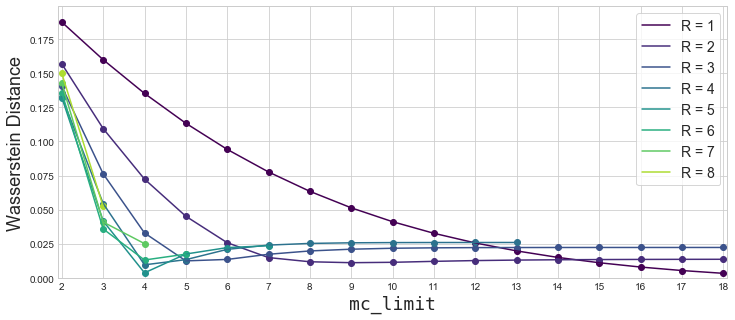

In [20]:
fig, ax = plt.subplots(1, figsize=(15, 5))
col = plt.cm.viridis(np.linspace(0,1,9))    
for R in range(1, 9):
    ax.plot(mc_limits, accuracies[R], label=f"R = {R}", c=col[R-1])
    ax.scatter(mc_limits, accuracies[R], color=col[R-1])
ax.set_ylabel('Wasserstein Distance', fontsize=18)
ax.set_xlabel('mc_limit', family='monospace', fontsize=18)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(fontsize=14, frameon=True)
ax.set_xticks(mc_limits)
ax.set_ylim(bottom=0)
ax.set_xlim(left=mc_limits[0]-0.1, right=mc_limits[-1]+0.1)
plt.show()

We can see that the higher the $R$ the more accurate the model is with smaller `mc_limit`s.
Small $R$s need larger `mc_limit`s to get accurate.

Note: I don't know why for many of these the accuracy increases again, but then stablises. The only thing we change is the `mc_limit`, and so I am putting this fown to numerical error. Each curve for each $R$ follows the same pattern. (I think $R = 1$ would also do this for higher `mc_limit`s).

Another interesting thing to note is that the higher the $R$, the curves settle on higher Wasserstein distance, so lower accuracy. But settle quicker. Despite this, the accuracies are pertty good.

### Sanity check:
Just making sure that the theoretical $\pi_n$'s match with the simulation $\pi_n$'s, and they do.

Why do the curves settle on an slight inaccuracy? Each component part of Method 1 matches well (state probabilities, and $\pi_i$s) the only room for error is in calculating the sojourn times of a single PS queue, which we know is an approximation anyway.

In [45]:
S = jsq.Simulation(lambda_=10, mu=10/(3*0.75), R=3, max_time=20000, warmup=500, tracker=ciw.trackers.NodePopulationSubset([2]), ps_bar=True)
S.run(seed=0)
S.find_sojourn_time_cdf(times)

100%|██████████| 20000.0/20000 [00:12<00:00, 1578.94it/s]           


In [22]:
M1 = jsq.Method1(lambda_=10, mu=10/(3*0.75), R=3, mc_limit=12, infty=130, zero=0)
M1.find_sojourn_time_cdf(times)

In [48]:
{i: ((1 / pd.DataFrame(S.recs)[(pd.DataFrame(S.recs)['queue_size_at_arrival']==i) & (pd.DataFrame(S.recs)['node']==2)].sort_values('arrival_date')['arrival_date'].diff().mean()) / 10) / S.Q.statetracker.state_probabilities()[(i,)] for i in range(12)}

{0: 0.6208428142445997,
 1: 0.28170042130882,
 2: 0.2029034679628574,
 3: 0.19109334960630497,
 4: 0.18071970619742178,
 5: 0.18969823469224673,
 6: 0.16864181049257448,
 7: 0.20274831190772766,
 8: 0.26965239020913545,
 9: 0.128942178414035,
 10: 0.1456219322480824,
 11: 59819.59873891512}

In [49]:
{i: M1.props[i] for i in range(12)}

{0: 0.6241229528264081,
 1: 0.2814663859442463,
 2: 0.20293490134994083,
 3: 0.1898699028801505,
 4: 0.18785810470659475,
 5: 0.18755095941572061,
 6: 0.187493453580221,
 7: 0.18742750177188708,
 8: 0.1871190018415609,
 9: 0.18545080088214375,
 10: 0.1755720214782714,
 11: 0.10397119261774151}